<h2><center><strong>CAPSTONE FOR DATA SCIENCE CERTIFICATION</strong></center></h2>

<h2><center><strong>Analysis of Barcelona's hostelry, hospitality and recreational sector for supply and service industry development</strong></center></h2>

***

# Introduction 

This try to be a parcial market study about hospitality sector in Barcelona's city. It's also included the hostelry and recreational bussiness like gymns, in order to support the auxiliar service and utilities industry that supplay to those mentioned main industries.

### Target market for the study

For instance, catering companies that work serving to hotels or restaurants, cleaning and desinfection companies, laundries, kitchenware suppliers, fresh food, etc.. all the companies that give services or supply goods for hotels, hostals, restaurants, and/or gyms in Barcelona 

### Area of study

All the mentioned services's and utilities companies above need to know where fisicaly their possible objetive clients are. Also, they need to create areas dividing the city in order to give the best posible service for their clients. That's why, this studie try to use the known data bases of Barcelona to divide the city in areas and get a possible location for their warehouse or centralitation office for each area.


### Methodology 


It is possible to use K-Mean clustering to divide the city in areas or groups because K-Mean try to group the elements with the less posible distance between elements of the group but getting the highest distance between each group. Furthermore, the K-Mean method provide the centroids, it means, a center point of the group where idealy can be localized an operational centralitation like warehouse or office to operate each group.
Instead of use an Euclidean space, we can use longitude and latitude as a Cartesian space for K-Means.

# Data sources

### Barcelona's opendata repository

https://opendata-ajuntament.barcelona.cat/

In the link above it's posible to find a large source of oficial information from Barcelon's Council.
Thanks to this open data availability , it's why I decided to focuse the study in Barcelona's city. The dataset provides the information in wide range of formats. The acaccessibility can be directly through the links in the web or through their different API's. A better explanation of the API management can be found on the link below :

https://opendata-ajuntament.barcelona.cat/en/desenvolupadors



### Foursquare API 

Because in the council dataset, the information about potential recreational business like gyms are mixed with other sectors and the information is not easy to handle, in the study will be used Foursquare dataset to get the closed gyms to the centroids based on their distance. To get it, the Python Foursquare pakage will be used to get an easy access. 

https://pypi.org/project/foursquare/

---

# Data Procesing

## Required libraries

In [1]:
import random                            
import json
import platform
print('python version \t:\t {}'.format(platform.python_version()))
import pandas as pd 
from pandas.io.json import build_table_schema
print('pandas version \t:\t {}'.format(pd.__version__))
import numpy as np                       
print('numpy version \t:\t {}'.format(np.__version__))
import folium                            
print('folium version \t:\t {}'.format(folium.__version__))
import matplotlib
import matplotlib.pyplot as plt          
print('matplotlib version \t:\t {}'.format(matplotlib.__version__))
import foursquare                        
print('foursquare version \t:\t {}'.format(foursquare.__version__))
import sklearn
from sklearn.cluster import KMeans       
print('sklearn version \t:\t {}'.format(sklearn.__version__))
from IPython.display import display, HTML
import geopy
from geopy.geocoders import Nominatim
print('geopy version \t:\t {}'.format(geopy.__version__))

python version 	:	 3.8.6
pandas version 	:	 1.1.4
numpy version 	:	 1.19.3
folium version 	:	 0.11.0
matplotlib version 	:	 3.3.2
foursquare version 	:	 1!2020.1.30
sklearn version 	:	 0.23.2
geopy version 	:	 2.0.0


## Data collection

Please, for further information, see the link below to get an explanation of how to get the information from Barcelona's open data repository. For this study it's intreating the information of gesthouses, hostels, hotels and restaurants. That information is available in different formats, in this case, the CVS format will be selected. The code will generate a pandas dataframe for each table and print the name of the dataframe and its shape to get an idea about how long the table it's.

https://opendata-ajuntament.barcelona.cat/en/desenvolupadors

In [2]:
dic ={
    'guesthouse': ['7e28b5cc-f9df-4c66-98eb-35a7e01a330f', '73832e19-7f8a-4844-b7ab-12888d8f6e77'],
    'hostel' : ['d5e60f7d-3828-4b60-9be1-84d4c9c4b85c','c6ecf590-eac8-46fe-bacd-ec094d5bc33b'],
    'hotel'  : ['88efe464-2bcd-4794-85b0-8b0bbfd9e4c0','eced0fe8-9892-4926-b035-4fdc7328e31d'],
    'restaurants' : ['b4d2cc2f-67dc-481a-a7cb-1999fd0d5740','f4f2abbf-09e8-42a4-9648-c26ec5e0f3be'],
    'Neighborhood_BCN' : ['808daafa-d9ce-48c0-925a-fa5afdb1ed41','4cc59b76-a977-40ac-8748-61217c8ff367']
}

for i in dic:
    url='https://opendata-ajuntament.barcelona.cat/data/dataset/{}/resource/{}/download'.format(dic[i][0], dic[i][1])
    exec('{}=pd.read_csv(\'{}\') \nprint(\'DataFrame {} shape :  \', {}.shape)'.format(i, url, i, i))



DataFrame guesthouse shape :   (580, 33)
DataFrame hostel shape :   (564, 33)
DataFrame hotel shape :   (884, 33)
DataFrame restaurants shape :   (16936, 33)
DataFrame Neighborhood_BCN shape :   (73, 4)


## Format tables and depreciation of unnecessary columns

### Accommodations 

"guesthouse", "hostel" and "hotel" tables contain the same structure so all of them can be transformed and join in a single dataframe

A "Category" column is created to define the diferent type of business to keep that information after being joined

In [3]:
guesthouse['CATEGORY']='guesthouse'
hostel['CATEGORY']='hostel'
hotel['CATEGORY']='hotel'

In "...NIVELL" columns it's posible to find which category of accommodation it is.
For instance, "3ER_NIVELL" column contains the hotel category stars, "2N_NIVELL" column contains if the guesthouse is an apartment , students residency, young hostel or other type. For hostels there isn't any farther information.
What it's propoused is to map that information with numbers from 10 to 0. On one hand that information can be categorized, making luxury hotels more interesting than young hostels.On the other hand, it's better for an easier access in further analysis.

Definitions :
>    * For hotels, stars +10 --> from 0 starts to 5 starts = 5 to 10.
>    * hostels =4
>   - guesthouse; 
>       - Apartments =3
>       - student housing and University residences  =2
>       - young hostel = 1
>       - not defined categories = 0

In [4]:
hotel['LEVEL']=hotel['3ER_NIVELL'].str.extract(r'(\d)').astype('int64')+5
hostel['LEVEL']=4
guesthouse['LEVEL']=guesthouse['2N_NIVELL'].replace({
    'Apartaments' : 3, 
    'Col.legis majors' : 2, 
    'Residències d\'estudiants' :2 , 
    'Albergs juvenils' :1, 
    'Altres allotjaments' : 0
    })

Now the tables are joined in one dataframe called 'accommodation' 

In [5]:
accommodations =guesthouse.append(hostel, ignore_index=True).append(hotel, ignore_index=True)
accommodations.reset_index()
print('accommodations dataframe'.center(100))
accommodations.head(3)

                                      accommodations dataframe                                      


CODI_EQUIPAMENT                        EQUIPAMENT SECCIO TIPUS_VIA  \
0        146175914  Residència Universitària Lesseps      #        Pl   
1        146175914  Residència Universitària Lesseps      #        Pl   
2        146175914  Residència Universitària Lesseps      #        Pl   

  NOM_CARRER  NUM_CARRER_1  NUM_CARRER_2  CODI_BARRI          NUM_BARRI  \
0    Lesseps            12          12.0          31  la Vila de Gràcia   
1    Lesseps            12          12.0          31  la Vila de Gràcia   
2    Lesseps            12          12.0          31  la Vila de Gràcia   

   CODI_DISTRICTE  ... HORARI_DIES  HORARI_HORES_INICI  HORARI_HORES_FI  \
0               6  ...         NaN                 NaN              NaN   
1               6  ...         NaN                 NaN              NaN   
2               6  ...         NaN                 NaN              NaN   

  HORARI_OBSERVACIONS  3ER_NIVELL                 2N_NIVELL   1ER_NIVELL  \
0                 NaN         NaN  Residències d'estudiants  Allotjament   
1                 NaN         NaN  Residències d'estudiants  Allotjament   
2                 NaN         NaN  Residències d'estudiants  Allotjament   

   Unnamed: 32    CATEGORY  LEVEL  
0          NaN  guesthouse      2  
1          NaN  guesthouse      2  
2          NaN  guesthouse      2  

[3 rows x 35 columns]

Unnecessary columns and possible dupicated lines are droped

In [6]:
print('Columns before cleaning : ', accommodations.columns, '\nShape : ', accommodations.shape)
accommodations.drop(['SECCIO','Unnamed: 32',
                  '3ER_NIVELL', '2N_NIVELL', '1ER_NIVELL', 
                  'CODI_POBLACIO','POBLACIO', 'TIPUS_VIA', 'NOM_CARRER', 'NUM_CARRER_1', 'NUM_CARRER_2', 
                  'X_ETRS89', 'Y_ETRS89', 'X_ED50', 'Y_ED50', 
                  'TELEFON_NUM', 'TELEFON_TIPUS', 'TELEFON_INFO_COM', 
                  'HORARI_PERIODE_INICI', 'HORARI_PERIODE_FI', 'HORARI_DIES', 'HORARI_HORES_INICI', 'HORARI_HORES_FI', 'HORARI_OBSERVACIONS'], 
                 axis=1, inplace=True)
accommodations.drop_duplicates(inplace=True)
print('Columns after cleaning : ', accommodations.columns, '\nShape : ', accommodations.shape)

Columns before cleaning :  Index(['CODI_EQUIPAMENT', 'EQUIPAMENT', 'SECCIO', 'TIPUS_VIA', 'NOM_CARRER',
       'NUM_CARRER_1', 'NUM_CARRER_2', 'CODI_BARRI', 'NUM_BARRI',
       'CODI_DISTRICTE', 'NOM_DISTRICTE', 'CODI_POSTAL', 'CODI_POBLACIO',
       'POBLACIO', 'LATITUD', 'LONGITUD', 'X_ETRS89', 'Y_ETRS89', 'X_ED50',
       'Y_ED50', 'TELEFON_NUM', 'TELEFON_TIPUS', 'TELEFON_INFO_COM',
       'HORARI_PERIODE_INICI', 'HORARI_PERIODE_FI', 'HORARI_DIES',
       'HORARI_HORES_INICI', 'HORARI_HORES_FI', 'HORARI_OBSERVACIONS',
       '3ER_NIVELL', '2N_NIVELL', '1ER_NIVELL', 'Unnamed: 32', 'CATEGORY',
       'LEVEL'],
      dtype='object') 
Shape :  (2028, 35)
Columns after cleaning :  Index(['CODI_EQUIPAMENT', 'EQUIPAMENT', 'CODI_BARRI', 'NUM_BARRI',
       'CODI_DISTRICTE', 'NOM_DISTRICTE', 'CODI_POSTAL', 'LATITUD', 'LONGITUD',
       'CATEGORY', 'LEVEL'],
      dtype='object') 
Shape :  (1031, 11)


And print the dataframe

In [7]:
print('accommodations dataframe')
print(accommodations.shape)
accommodations.head(3)

accommodations dataframe
(1031, 11)


CODI_EQUIPAMENT                              EQUIPAMENT  CODI_BARRI  \
0        146175914        Residència Universitària Lesseps          31   
3        146180329  Residència Universitària La Ciutadella          66   
6      75990016464   Col.legi Major Universitari Lestonnac           7   

                           NUM_BARRI  CODI_DISTRICTE NOM_DISTRICTE  \
0                  la Vila de Gràcia               6        Gràcia   
3  el Parc i la Llacuna del Poblenou              10    Sant Martí   
6               la Dreta de Eixample               2      Eixample   

   CODI_POSTAL    LATITUD  LONGITUD    CATEGORY  LEVEL  
0         8023  41.407168  2.151154  guesthouse      2  
3         8018  41.391563  2.186115  guesthouse      2  
6         8007  41.392634  2.165757  guesthouse      2

### Restaurants

Drop duplicated lines unnecessary columns and print

In [8]:
restaurants.drop_duplicates(inplace= True)
print('Restaurants columns : ', restaurants.columns, '\nShape : ', restaurants.shape)

Restaurants columns :  Index(['CODI_EQUIPAMENT', 'EQUIPAMENT', 'SECCIO', 'TIPUS_VIA', 'NOM_CARRER',
       'NUM_CARRER_1', 'NUM_CARRER_2', 'CODI_BARRI', 'NUM_BARRI',
       'CODI_DISTRICTE', 'NOM_DISTRICTE', 'CODI_POSTAL', 'CODI_POBLACIO',
       'POBLACIO', 'LATITUD', 'LONGITUD', 'X_ETRS89', 'Y_ETRS89', 'X_ED50',
       'Y_ED50', 'TELEFON_NUM', 'TELEFON_TIPUS', 'TELEFON_INFO_COM',
       'HORARI_PERIODE_INICI', 'HORARI_PERIODE_FI', 'HORARI_DIES',
       'HORARI_HORES_INICI', 'HORARI_HORES_FI', 'HORARI_OBSERVACIONS',
       '3ER_NIVELL', '2N_NIVELL', '1ER_NIVELL', 'Unnamed: 32'],
      dtype='object') 
Shape :  (16909, 33)


In [9]:
restaurants.drop([
    'TIPUS_VIA', 'NOM_CARRER', 'SECCIO', 'POBLACIO',
    'NUM_CARRER_1', 'NUM_CARRER_2', 'CODI_POBLACIO','X_ETRS89', 'Y_ETRS89', 'X_ED50', 'Y_ED50',
    'TELEFON_NUM', 'TELEFON_TIPUS', 'TELEFON_INFO_COM',
    'HORARI_PERIODE_INICI', 'HORARI_PERIODE_FI', 'HORARI_DIES', 'HORARI_HORES_INICI', 'HORARI_HORES_FI', 'HORARI_OBSERVACIONS',
    '3ER_NIVELL', '2N_NIVELL', '1ER_NIVELL', 'Unnamed: 32'
                 ],axis=1, inplace=True)
restaurants.drop_duplicates(inplace=True)
print('Restaurants columns after cleaning : ', restaurants.columns, '\nShape : ', restaurants.shape)

Restaurants columns after cleaning :  Index(['CODI_EQUIPAMENT', 'EQUIPAMENT', 'CODI_BARRI', 'NUM_BARRI',
       'CODI_DISTRICTE', 'NOM_DISTRICTE', 'CODI_POSTAL', 'LATITUD',
       'LONGITUD'],
      dtype='object') 
Shape :  (2469, 9)


And print the first lines of the table

In [10]:
print('restaurants dataframe'.center(100))
restaurants.head(3)

                                       restaurants dataframe                                        


CODI_EQUIPAMENT                               EQUIPAMENT  CODI_BARRI  \
0          53170444  Restaurant  Tapes Tapas *Poble Espanyol          11   
9          94135210                 Restaurant Japonès Ginza           8   
15        140145849         Hotel Rívoli Ramblas - HB-003878           2   

                          NUM_BARRI  CODI_DISTRICTE   NOM_DISTRICTE  \
0                      el Poble-sec               3  Sants-Montjuïc   
9   l'Antiga Esquerra de l'Eixample               2        Eixample   
15                   el Barri Gòtic               1    Ciutat Vella   

    CODI_POSTAL    LATITUD  LONGITUD  
0          8038  41.369148  2.146751  
9          8008  41.392182  2.157920  
15         8002  41.384315  2.171183

# Visualization

## Visualization of the information on maps

For display the information on the map, it's used folium technology

In this map we see all the restaurants and accomodations in the city. In the control layer can be selected the differnt layers and the marks has been clustered for a clear visualization.

In [11]:
from folium.plugins import MarkerCluster
Barcelona_map = folium.Map(location=[41.4023,2.2], zoom_start=13,
                            prefer_canvas=True,
                          width = '100%',
                          height = '80%',
                          control_scale=True,
                          tiles= 'cartodbpositron')

marker_cluster = MarkerCluster(
    locations =accommodations[['LATITUD', 'LONGITUD']].values.tolist(),
    popup= accommodations['EQUIPAMENT'].values.tolist(),
    name= 'accommodations',
    overlay=True,
    control=True,
    #icon_create_function= folium.Icon(color='red', icon='info-sign')
    ).add_to(Barcelona_map)

marker_cluster = MarkerCluster(
    locations =restaurants[['LATITUD', 'LONGITUD']].values.tolist(),
    popup= restaurants['EQUIPAMENT'].values.tolist(),
    name= 'restaurants',
    overlay=True,
    control=True,
    #icon_create_function= folium.Icon(color='red', icon='info-sign')
    ).add_to(Barcelona_map)

folium.map.LayerControl(position ='topright',).add_to(Barcelona_map)
Barcelona_map

Let's see the information in a choropleth map. In one map are included the accomodations and it's density by neighborhoods. The next one contain the restaurants and density by neighborhoods, also. For that, it's prepared a table grouping the elements by neighborhood.

In [12]:
neighborhood_BCN_geojson='https://raw.githubusercontent.com/martgnz/bcn-geodata/master/barris/barris.geojson'

accommodations_account=accommodations[['CODI_BARRI', 'NUM_BARRI']].groupby('CODI_BARRI', as_index=False).count()
accommodations_account['CODI_BARRI']=accommodations_account['CODI_BARRI'].apply(lambda x: (str(x).zfill(2)))

Barcelona_map_acc=folium.Map(location=[41.4023,2.2], zoom_start=13,
                            prefer_canvas=True,
                          width = '100%',
                          height = '80%',
                          control_scale=True,
                          tiles= 'cartodbpositron')
folium.Choropleth(
    geo_data = neighborhood_BCN_geojson,
    data = accommodations_account,
    columns = ['CODI_BARRI', 'NUM_BARRI'],
    key_on = 'feature.properties.BARRI',
    fill_color = 'Blues',
    nan_fill_color ='white',
    bins=5,
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='accommodations per neighborhood '
    ).add_to(Barcelona_map_acc)

for lat, long in zip(accommodations.LATITUD, accommodations.LONGITUD):                 
    folium.CircleMarker(
        [lat, long],
        radius=2,
        color='Red',
        fill=True
        ).add_to(Barcelona_map_acc)

Barcelona_map_acc

In [13]:
restaurants_account=restaurants[['CODI_BARRI', 'NUM_BARRI']].groupby('CODI_BARRI', as_index=False).count()
restaurants_account['CODI_BARRI']=restaurants_account['CODI_BARRI'].apply(lambda x: (str(x).zfill(2)))

Barcelona_map_resta=folium.Map(location=[41.4023,2.2], zoom_start=13,
                            prefer_canvas=True,
                          width = '100%',
                          height = '80%',
                          control_scale=True,
                          tiles= 'cartodbpositron')
folium.Choropleth(
    geo_data = neighborhood_BCN_geojson,
    data = restaurants_account,
    columns = ['CODI_BARRI', 'NUM_BARRI'],
    key_on = 'feature.properties.BARRI',
    fill_color = 'Blues',
    nan_fill_color ='white',
    bins=5,
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='restaurants per neighborhood '
    ).add_to(Barcelona_map_resta)

for lat, long in zip(restaurants.LATITUD, restaurants.LONGITUD):                 
    folium.CircleMarker(
        [lat, long],
        radius=2,
        color='Green',
        fill=True
        ).add_to(Barcelona_map_resta)

Barcelona_map_resta

# Analysis

As we can see, most of the restaurans and accomodations are concentred in two or three neighborhood arround the city center:

In [14]:
from IPython.display import display_html

accommodations_account['CODI_BARRI']=accommodations_account['CODI_BARRI'].apply(lambda x: int(x))
restaurants_account['CODI_BARRI']=restaurants_account['CODI_BARRI'].apply(lambda x: int(x))
Neighborhood_BCN['CODI_DISTRICTE']=Neighborhood_BCN['CODI_DISTRICTE'].apply(lambda x: int(x))

accommodations_account = accommodations_account.merge(Neighborhood_BCN, on='CODI_BARRI', left_index=True, how='left', sort=True).sort_values(by='NUM_BARRI', ascending=False)
accommodations_account.columns =['Neighb_code', 'Accom_quantity', 'District_code', 'District_name', 'Neighb_Name']


restaurants_account =restaurants_account.merge(Neighborhood_BCN, on='CODI_BARRI', left_index=True, how='left', sort=True).sort_values(by='NUM_BARRI', ascending=False)
restaurants_account.columns =['Neighb_code', 'Restaur_quantity', 'District_code', 'District_name', 'Neighb_Name']


accommodations_account_styler = accommodations_account.head().style.set_table_attributes("style='display:inline'").set_caption('<strong><em> Neighborhoods with more accommodations</em></strong>')
restaurants_account_styler = restaurants_account.head().style.set_table_attributes("style='display:inline'").set_caption('<strong><em> Neighborhoods with more restaurants </em></strong>')

space = "\xa0" * 20
display_html(accommodations_account_styler._repr_html_()+ space  +restaurants_account_styler._repr_html_(), raw=True)

Neighborhoods with more accommodations Neighb_code Accom_quantity District_code District_name Neighb_Name 
 
 6 
 7 
 253 
 2 
 Eixample 
 la Dreta de l'Eixample 
 
 
 1 
 2 
 112 
 1 
 Ciutat Vella 
 el Barri Gòtic 
 
 
 7 
 8 
 91 
 2 
 Eixample 
 l'Antiga Esquerra de l'Eixample 
 
 
 0 
 1 
 86 
 1 
 Ciutat Vella 
 el Raval 
 
 
 30 
 31 
 40 
 6 
 Gràcia 
 la Vila de Gràcia 
 
                      Neighborhoods with more restaurants Neighb_code Restaur_quantity District_code District_name Neighb_Name 
 
 6 
 7 
 291 
 2 
 Eixample 
 la Dreta de l'Eixample 
 
 
 7 
 8 
 265 
 2 
 Eixample 
 l'Antiga Esquerra de l'Eixample 
 
 
 1 
 2 
 159 
 1 
 Ciutat Vella 
 el Barri Gòtic 
 
 
 30 
 31 
 159 
 6 
 Gràcia 
 la Vila de Gràcia 
 
 
 25 
 26 
 151 
 5 
 Sarrià-Sant Gervasi 
 Sant Gervasi - Galvany

Those companies which doesn't want to provide services to all of the possible clients (restaurants and accomodations) in all over the city, better will be concrentrated on **'Eixample'** and **'Ciutat Vella'** districts.

<div class="alert alert-block alert-warning">But in this study we want to analyze those companies which aim to attend all ppossible clients in the city. To capture such a large amount of clients, these companies need to divide their resources and create working groups in order to provide a better service. Imagine that each group is in charge of a different area of the city and each area needs a work-center (warehouse or office) to support the group. Each area needs to capture the maximum possible clients with the less distance between them.  
</div>

For this task is possible to use **KMeans**. It will divide the clients in the number of groups that we want and provide the centroids where to locate the workin-centers. Each group will optimize the resources

First of all it's necesary to determine the number of areas. So we can use the **Inertia** to evaluate wich number of groups will be better. let's see what is the inertia dividing the city between 2 to 8 groups for accomodations, and the same for restaurants:

In [15]:
#restaurants  CODI_EQUIPAMENT	EQUIPAMENT	CODI_BARRI	NUM_BARRI	CODI_DISTRICTE	NOM_DISTRICTE	CODI_POSTAL	LATITUD	LONGITUD
#accommodations  CODI_EQUIPAMENT	EQUIPAMENT	CODI_BARRI	NUM_BARRI	CODI_DISTRICTE	NOM_DISTRICTE	CODI_POSTAL	LATITUD	LONGITUD	CATEGORY	LEVEL
X_accommodations=accommodations.loc[:,['LATITUD','LONGITUD']]
accommodations_inertias=list()
Areas_loop=range(2, 9)

print("GROUPS OF ACCOMMODATIONS")
for i in Areas_loop:
    kmeans = KMeans(n_clusters=i, n_init=20, max_iter=1000 , random_state=0).fit(X_accommodations)
    accommodations_inertias.append(kmeans.inertia_)
    print('inertia for {} groups : '.format(i), round(kmeans.inertia_, 3) )
for i in range(len(Areas_loop)):
    try:
        print('variance between {} and {} groups : '.format(Areas_loop[i], Areas_loop[i+1]), round(accommodations_inertias[i]-accommodations_inertias[i+1], 3))
    except:
        pass

X_restaurants=restaurants.loc[:,['LATITUD','LONGITUD']]
restaurants_inertias=list()
Areas_loop=range(2, 9)
print("----------------------------------------------\nGROUPS OF RESTAURANTS")
for i in Areas_loop:
    kmeans = KMeans(n_clusters=i, n_init=20, max_iter=1000 , random_state=0).fit(X_restaurants)
    restaurants_inertias.append(kmeans.inertia_)
    print('inertia for {} groups : '.format(i), round(kmeans.inertia_, 3) )
for i in range(len(Areas_loop)):
    try:
        print('variance between {} and {} groups : '.format(Areas_loop[i], Areas_loop[i+1]), round(restaurants_inertias[i]-restaurants_inertias[i+1], 3))
    except:
        pass


X_all=accommodations.loc[:,['LATITUD','LONGITUD']].append(restaurants.loc[:,['LATITUD','LONGITUD']])
all_inertias=list()
Areas_loop=range(2, 9)
print("----------------------------------------------\nGROUPS OF ACCOMODATIONS AND RESTAURANTS TOGETHER")
for i in Areas_loop:
    kmeans = KMeans(n_clusters=i, n_init=20, max_iter=1000 , random_state=0).fit(X_all)
    all_inertias.append(kmeans.inertia_)
    print('inertia for {} groups : '.format(i), round(kmeans.inertia_, 3) )
for i in range(len(Areas_loop)):
    try:
        print('variance between {} and {} groups : '.format(Areas_loop[i], Areas_loop[i+1]), round(restaurants_inertias[i]-restaurants_inertias[i+1], 3))
    except:
        pass


GROUPS OF ACCOMMODATIONS
inertia for 2 groups :  0.251
inertia for 3 groups :  0.185
inertia for 4 groups :  0.142
inertia for 5 groups :  0.117
inertia for 6 groups :  0.1
inertia for 7 groups :  0.087
inertia for 8 groups :  0.074
variance between 2 and 3 groups :  0.066
variance between 3 and 4 groups :  0.043
variance between 4 and 5 groups :  0.025
variance between 5 and 6 groups :  0.016
variance between 6 and 7 groups :  0.014
variance between 7 and 8 groups :  0.012
----------------------------------------------
GROUPS OF RESTAURANTS
inertia for 2 groups :  0.829
inertia for 3 groups :  0.577
inertia for 4 groups :  0.447
inertia for 5 groups :  0.364
inertia for 6 groups :  0.298
inertia for 7 groups :  0.255
inertia for 8 groups :  0.22
variance between 2 and 3 groups :  0.253
variance between 3 and 4 groups :  0.13
variance between 4 and 5 groups :  0.083
variance between 5 and 6 groups :  0.066
variance between 6 and 7 groups :  0.043
variance between 7 and 8 groups :  0.03

We can observe that applying KMean on lower quantity of elements, generate lower inertia. It means, considering only the accomodations will generate less inertia than the restaurants or all together because there are less elements. However, the sum of the individual inertias is higher than the inertia of all together .
<blockquote>So we will consider <strong>all the elements together</strong> and not separete restaurants and hotels</blockquote>
Secondly, we observe that as higher is the number of the groups, lower is the inertia (something logical). But the difference betwbetween 7 to 8 groups it's very low and considering that as more groups we do, less resources we have because the resorcess should be distributed by groups. It's necesary to find the less groups with a better performance. 
<blockquote>For that reason, we will considere a division in <strong>6 groups</strong></blockquote>


Let's apply the kMeans analysis for all elements in 6 groups and generatea a table including all the elements and a new column with the number of the group to which they belong to.

In [16]:
n_groups=6
kmeans = KMeans(n_clusters=n_groups,n_init=20, max_iter=1000 , random_state=0).fit(X_all)
id_label=kmeans.labels_
centroids=kmeans.cluster_centers_

ALL=accommodations.append(restaurants, ignore_index=True)
ALL['GROUP']=id_label
print('all elements with assigned area')
print(ALL.shape)
ALL.head()

all elements with assigned area
(3500, 12)


CODI_EQUIPAMENT                              EQUIPAMENT  CODI_BARRI  \
0        146175914        Residència Universitària Lesseps          31   
1        146180329  Residència Universitària La Ciutadella          66   
2      75990016464   Col.legi Major Universitari Lestonnac           7   
3      75990020227       Residencia Madre Isabel Larrañaga          24   
4      75990020841      Residencia e Institución Javeriana           4   

                               NUM_BARRI  CODI_DISTRICTE        NOM_DISTRICTE  \
0                      la Vila de Gràcia               6               Gràcia   
1      el Parc i la Llacuna del Poblenou              10           Sant Martí   
2                   la Dreta de Eixample               2             Eixample   
3                        les Tres Torres               5  Sarrià-Sant Gervasi   
4  Sant Pere, Santa Caterina i la Ribera               1         Ciutat Vella   

   CODI_POSTAL    LATITUD  LONGITUD    CATEGORY  LEVEL  GROUP  
0         8023  41.407168  2.151154  guesthouse    2.0      4  
1         8018  41.391563  2.186115  guesthouse    2.0      0  
2         8007  41.392634  2.165757  guesthouse    2.0      4  
3         8017  41.397669  2.128852  guesthouse    2.0      2  
4         8003  41.385713  2.177711  guesthouse    2.0      0

Now we can divide that long dataframe in 6 dataframes one for each group:

In [17]:
for i in range(n_groups):
    exec('group_{}=ALL.loc[ALL[\'GROUP\']=={}]'.format(i,i))
    exec('print(\'shape of dataframe "group_{}" : \', group_{}.shape)'.format(i, i))

shape of dataframe "group_0" :  (1117, 12)
shape of dataframe "group_1" :  (452, 12)
shape of dataframe "group_2" :  (517, 12)
shape of dataframe "group_3" :  (184, 12)
shape of dataframe "group_4" :  (974, 12)
shape of dataframe "group_5" :  (256, 12)


à Voilà!! Here we can see all the restaurants and accomodations of Barcelona clustered in 6 groups by K-Mean. 

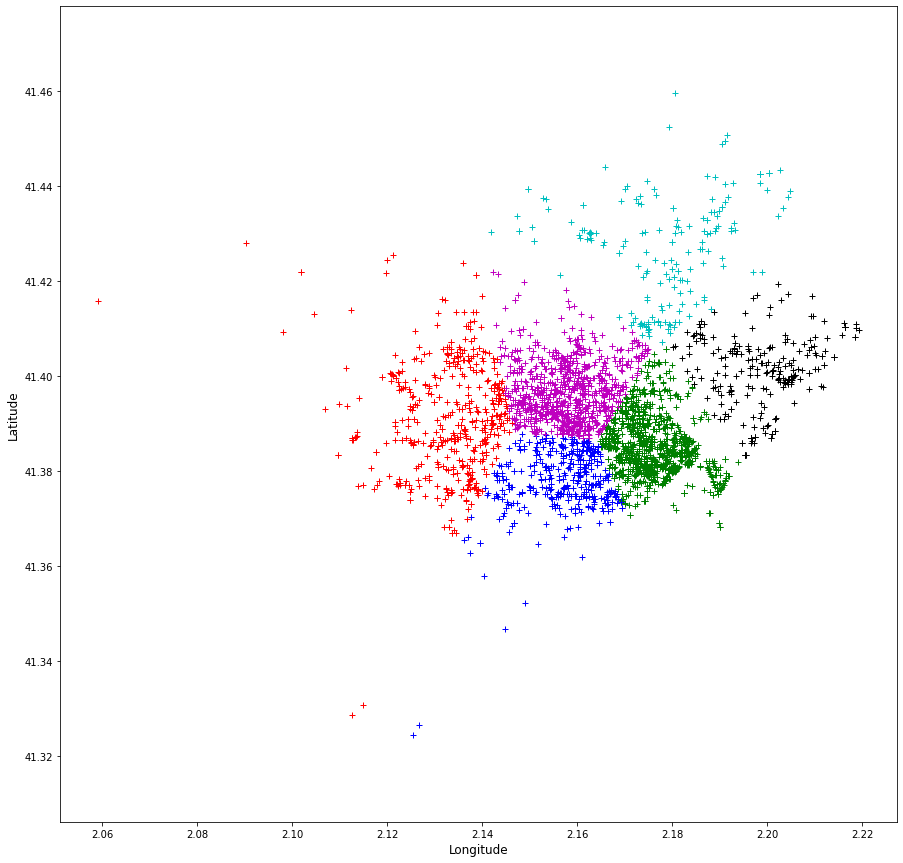

In [18]:
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,15))
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
for i in range(n_groups):
    cluster=np.where(id_label==i)[0]
    color=random.choice(colors)
    colors.remove(color)
    plt.plot(X_all.LONGITUD.iloc[cluster].values,X_all.LATITUD.iloc[cluster].values, (color+'+'))
plt.axis('equal')
plt.show()

And the centroids, with their locations

In [19]:
geolocator = Nominatim(user_agent="example app")
centroids_df=pd.DataFrame(centroids, columns=['LATITUD', 'LONGITUD'])
n=0
for long, lat in zip(centroids_df['LATITUD'], centroids_df['LONGITUD']):
    location = geolocator.reverse('{}, {}'.format(long, lat))
    print('centroid for group {} : {}, {} \n\tlocation: {}'.format(n, long, lat, location.address))
    n+=1

centroid for group 0 : 41.38549036021505, 2.1756782096774194 
	location: 4, Carrer del Doctor Joaquim Pou, el Gòtic, Ciutat Vella, Barcelona, Barcelonès, Catalunya, 08002, España
centroid for group 1 : 41.37808499559471, 2.156656528634361 
	location: 65, Carrer de Calàbria, Project Area Sant Antoni, Font Trobada, Barcelona, Barcelonès, Catalunya, 08015, España
centroid for group 2 : 41.39092840038685, 2.1329128065764023 
	location: 10, Carrer de la Caravel·la La Niña, les Corts, Barcelona, Barcelonès, Catalunya, 08017, España
centroid for group 3 : 41.42713067391304, 2.1785231576086956 
	location: 4, Carrer de Sant Pasqual Bailón, el Congrés, el Congrés i els Indians, Sant Andreu, Barcelona, Barcelonès, Catalunya, 08027, España
centroid for group 4 : 41.3966167995889, 2.158021282631038 
	location: Església i convent de Pompeia, Carrer de la Riera de Sant Miquel, la Vila de Gràcia, Gràcia, Barcelona, Barcelonès, Catalunya, 08001, España
centroid for group 5 : 41.4009648828125, 2.1992438

### Foursquare to find Gyms

As commented in the introduction of the article , we can include the gyms, too. Because they have some similar requirements of providers and services as accomodations or restaurants. Information about gyms is possible to be found in Barcelona's open data repository. But it's mixed with other business, so easily it can be provided by Foursquare. For this process it's used the Foursquare's API which can found in pip repository.

In [20]:
CLIENT_ID = 'HX0G00TCTXRI0LPCJIXVRDIM3I0DV5UHC4NCODVAQ2XKJLL1'
CLIENT_SECRET = 'DA2Y4XBVMB5Y4T4NIFRURCHALDQD3RSDA3SNLFK5PBZDVABT'
fs_client = foursquare.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET )
fs_client

Now we can get the closest gyms to the centroids as possible clients to be study. Due to the limitations of Foursquare , a limit of 50 items is settled for each group and a radious of 1.5km arroun the center point. The result are achieved in separated dataframes for each group

In [21]:
n=0
for long, lat in zip(centroids_df['LATITUD'], centroids_df['LONGITUD']):
    ll= '{}, {}'.format(long, lat)
    fs_query = (fs_client.venues.search(params={ 'categoryId' : '4bf58dd8d48988d175941735', 'll': ll , 'radius': 1500, 'limit' : 50}))['venues'] 
    exec('Gyms_group_{a} = pd.json_normalize(fs_query) \nGyms_group_{a}[\'Group\']={a} \nGyms_group_{a}.drop([\'location.city\',\'location.state\',\'location.country\',\'location.cc\', \'location.crossStreet\', \'id\', \'categories\', \'referralId\', \'hasPerk\', \'location.labeledLatLngs\', \'location.formattedAddress\', \'venuePage.id\', \'location.state\', \'location.country\'], axis=1, inplace=True)\nGyms_group_{a}.columns=[\'NAME\',\'LOCATION\', \'LATITUD\', \'LONGITUD\', \'DISTANCE_CENTOID\', \'ZIP\', \'NEIGHBORHOOD\', \'GROUP\'] \nprint(\'DataFrame Gyms_group_{a} shape :  \', Gyms_group_{a}.shape)'.format(a=n))
    n+=1

DataFrame Gyms_group_0 shape :   (49, 8)
DataFrame Gyms_group_1 shape :   (50, 8)
DataFrame Gyms_group_2 shape :   (48, 8)
DataFrame Gyms_group_3 shape :   (44, 8)
DataFrame Gyms_group_4 shape :   (49, 8)
DataFrame Gyms_group_5 shape :   (49, 8)


Below we can see two examples of the dataframes:

In [22]:
print('DataFrame  Gyms_group_5'.center(100))
Gyms_group_5.head()

                                      DataFrame  Gyms_group_5                                       


NAME  \
0  Àgora (Psicoterapia y Desenvolvimiento Humano)   
1          Barcelona Martial Arts Academy (BCNMA)   
2                         Corporació Fisiogestion   
3                                   Feeling Woman   
4                                        Duet Fit   

                              LOCATION    LATITUD  LONGITUD  DISTANCE_CENTOID  \
0                        Calle Pujades  41.399024  2.197441               263   
1                      Roc Boronat, 66  41.400230  2.198661                95   
2  Carrer de la Ciutat de Granada, 115  41.401710  2.193483               488   
3                 Pere IV 29-35, 3º 5ª  41.394764  2.190814               985   
4                208 Avinguda Diagonal  41.404581  2.191114               789   

     ZIP NEIGHBORHOOD  GROUP  
0  08005          NaN      5  
1    NaN          NaN      5  
2  08018          NaN      5  
3  08018          NaN      5  
4  08018          NaN      5

In [23]:
print('DataFrame  Gyms_group_3'.center(100))
Gyms_group_3.head()

                                      DataFrame  Gyms_group_3                                       


NAME                        LOCATION  \
0  Duet Sports Coxteres Borbó (Oficial).            C/ Ramón Albó, 41-57   
1                           Gym Guinardó      Carrer del Telègraf, 33-65   
2                           Holmes Place  Avinguda de Rio de Janeiro, 42   
3                   Crossfit Sant Andreu              71 Calle del Segre   
4               Club Natació Sant Andreu       Rambla Fabra i Puig 45-47   

     LATITUD  LONGITUD  DISTANCE_CENTOID    ZIP NEIGHBORHOOD  GROUP  
0  41.426602  2.178902                66  08027          NaN      3  
1  41.416792  2.173619              1221  08041          NaN      3  
2  41.435380  2.180947               940  08016          NaN      3  
3  41.431867  2.194215              1411  08030          NaN      3  
4  41.429418  2.186491               712  08030          NaN      3

Let's see the information on a map:

In [24]:
Barcelona_map_gym = folium.Map(location=[41.4023,2.2], zoom_start=13, prefer_canvas=True, width = '100%', height = '80%', control_scale=True, tiles= 'cartodbpositron')

Color_list=list()
for i in range(n_groups):
    Color_list.append('#'+format(random.randint(0,16777215),'x'))
Color_list 

for i in range(n_groups):
    exec(('df=Gyms_group_{}').format(i))
    popupA='Centroid of group {}'.format(i)
    popupB='Gym of group {}'.format(i)
    color=Color_list[i]
    folium.Marker(
        location=(centroids_df.loc[i, 'LATITUD'], centroids_df.loc[i, 'LONGITUD']),
        popup=popupA,
    ).add_to(Barcelona_map_gym)
    for lat, long in zip(df['LATITUD'], df['LONGITUD']):
        folium.CircleMarker(
            [lat, long],
            radius = 1,
            color=color,
            popup= popupB,
            fill=True,
            fill_opacity=1,
            parse_html=False
        ).add_to(Barcelona_map_gym)

Barcelona_map_gym

# Conclusion

As we can see, K-Mean can be used also to distribute a big group of phisical points in the space in small groups which get the less distance between the elements into each group.
This can be useful for courier companies, distribution, logistics, etc.. 
